## [통계적머신러닝] 과제6
통계학과 2019150419 기다연<br>
2021.10.14

### 문제1.
CART에서 criterion을 gini와 entropy를 각각 적용하고 max_depth를 변경하여 결과를 비교하고 해석하라.

In [4]:
import seaborn as sns

iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y = iris['species']
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# y data를 범주형으로 변환
from sklearn.preprocessing import LabelEncoder

classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) # species 열의 문자열을 categorical 값으로 전환

In [5]:
# 전체 data를 training set과 test set으로 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


### 1. criterion = 'gini'

In [23]:
# Gini coefficient
from sklearn import tree
from sklearn import metrics
#from sklearn import DecisionTreeClassifier

train_gini, test_gini = [], []

for k in [1,2,3,4,5,6,7]:
    dtc = tree.DecisionTreeClassifier(criterion='gini', 
                                      max_depth=k,
                                      random_state=1)
    result = dtc.fit(X_train, y_train)
    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)
    
    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)
    train_gini.append(train_acc)
    test_gini.append(test_acc)
    
    print('DTC Accuracy(Gini, max_depth=%d : \n' % k, str(metrics.accuracy_score(y_test, y_test_pred)))
    print('DTC Confusion matrix(Gini, max_depth=%d : \n' % k, str(metrics.confusion_matrix(y_test, y_test_pred)))
    print('-'*100)

DTC Accuracy(Gini, max_depth=1 : 
 0.6666666666666666
DTC Confusion matrix(Gini, max_depth=1 : 
 [[15  0  0]
 [ 0 15  0]
 [ 0 15  0]]
----------------------------------------------------------------------------------------------------
DTC Accuracy(Gini, max_depth=2 : 
 0.9555555555555556
DTC Confusion matrix(Gini, max_depth=2 : 
 [[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
----------------------------------------------------------------------------------------------------
DTC Accuracy(Gini, max_depth=3 : 
 0.9777777777777777
DTC Confusion matrix(Gini, max_depth=3 : 
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
----------------------------------------------------------------------------------------------------
DTC Accuracy(Gini, max_depth=4 : 
 0.9777777777777777
DTC Confusion matrix(Gini, max_depth=4 : 
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
----------------------------------------------------------------------------------------------------
DTC Accuracy(Gini, max_depth=5 : 
 0.9777777777777777
DTC Co

### 2. criterion = 'entropy'

In [35]:
# Gini coefficient
from sklearn import tree
from sklearn import metrics
#from sklearn import DecisionTreeClassifier

train_entropy, test_entropy = [], []

for k in [1,2,3,4,5,6,7]:
    dtc = tree.DecisionTreeClassifier(criterion='entropy', 
                                      max_depth=k,
                                      random_state=1)
    result = dtc.fit(X_train, y_train)
    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)
    
    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)
    train_entropy.append(train_acc)
    test_entropy.append(test_acc)
    
    print('DTC Accuracy(Entropy, max_depth=%d : \n' % k, str(metrics.accuracy_score(y_test, y_test_pred)))
    print('DTC Confusion matrix(Entropy, max_depth=%d : \n' % k, str(metrics.confusion_matrix(y_test, y_test_pred)))
    print('-'*100)

DTC Accuracy(Entropy, max_depth=1 : 
 0.6666666666666666
DTC Confusion matrix(Entropy, max_depth=1 : 
 [[15  0  0]
 [ 0 15  0]
 [ 0 15  0]]
----------------------------------------------------------------------------------------------------
DTC Accuracy(Entropy, max_depth=2 : 
 0.9555555555555556
DTC Confusion matrix(Entropy, max_depth=2 : 
 [[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
----------------------------------------------------------------------------------------------------
DTC Accuracy(Entropy, max_depth=3 : 
 0.9555555555555556
DTC Confusion matrix(Entropy, max_depth=3 : 
 [[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
----------------------------------------------------------------------------------------------------
DTC Accuracy(Entropy, max_depth=4 : 
 0.9333333333333333
DTC Confusion matrix(Entropy, max_depth=4 : 
 [[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]
----------------------------------------------------------------------------------------------------
DTC Accuracy(Entropy, max_depth=5 : 

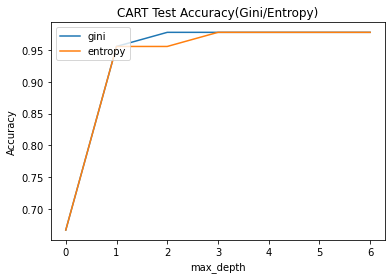

In [29]:
# test accuracy 비교
import matplotlib.pyplot as plt

plt.plot(test_gini)
plt.plot(test_entropy)
plt.title('CART Test Accuracy(Gini/Entropy)')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend(['gini', 'entropy'], loc = 'upper left')
plt.show()

In [32]:
print('Gini:\n', test_gini, '\n', 'Entropy:\n', test_entropy)

Gini:
 [0.6666666666666666, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777] 
 Entropy:
 [0.6666666666666666, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]


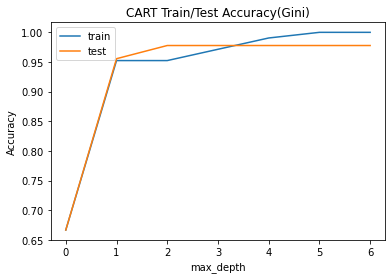

In [33]:
# overfitting 비교 (train/test accuracy 같이 비교)
plt.plot(train_gini)
plt.plot(test_gini)
plt.title('CART Train/Test Accuracy(Gini)')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

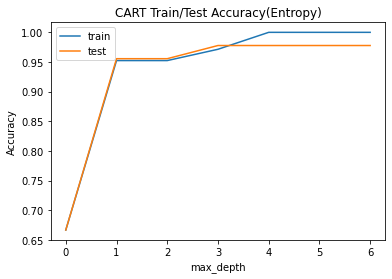

In [34]:
# overfitting 비교 (train/test accuracy 같이 비교)
plt.plot(train_entropy)
plt.plot(test_entropy)
plt.title('CART Train/Test Accuracy(Entropy)')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()